# IMBD Top Movies 

# 1. Data Collection
***

## Task: Data Collection:

### Date: 12-March-2024 ,Done By: Norah Mohammed Alwohaibi

In this section we will collect the row data, from IMDB website (https://www.imdb.com/list/ls063676189/) by web scrapping using this code below:
### First, import libraries:

In [1]:
import requests
from bs4 import BeautifulSoup#for html
import pandas as pd
import numpy as np
import csv

In [2]:
response = requests.get('https://www.imdb.com/list/ls063676189/?st_dt=&mode=detail&page=16&sort=list_order,asc')
print(response.status_code)#200 means ut is all good

200


code prints the status code of the response, which is typically '200' for a successful reques


### For the next step, parsing the HTML content using BeautifulSoup

i did search for the html tag that had each movie details using inspect from the browser, and then print the length of moives so i know each URL had how many movies(i did Scrape 20 URLs, by changing the URL in the next code each time)

In [3]:
soup = BeautifulSoup(response.text, 'html.parser')
movies = soup.find('div', class_="lister-list").find_all('div', class_="lister-item-content")
print(len(movies))

100


### Next, writing the data into the csv file

This code below opens a CSV file named 'imdb_movies_scrape16.csv' and writes movie details such as title, release year, plot summary, genre, ratings, director, stars, votes, and gross earnings. It iterates through each movie, extracts its attributes using BeautifulSoup from the parsed HTML, and writes them into the CSV file in separate columns.

In [4]:
# Open the CSV file in write mode and create a csv.writer object
with open('imdb_movies_scrape16.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the headers to the CSV file
    writer.writerow(['Title', 'Release year', 'Plot summary', 'Genre', 'Rating', 'Runtime', 'IMDb rating', 'Metascore', 'Director', 'Stars', 'Votes', 'Gross'])
    
    # Iterate through each movie and write its attributes as a row in the CSV file
    for movie in movies:
        title = movie.find('a').text.strip()
        release_year = movie.find('span', class_='lister-item-year').text.strip('()')
        plot_summary = movie.find('p', class_='').text.strip()
        genre = movie.find('span', class_='genre').text.strip()
        rating = movie.find('span', class_='ipl-rating-star__rating').text.strip()
        runtime = movie.find('span', class_='runtime').text.strip()
        imdb_rating = movie.find('div', class_='ipl-rating-star').find('span', class_='ipl-rating-star__rating').text.strip()
        metascore_element = movie.find('div', class_='inline-block ratings-metascore')
        metascore = metascore_element.text.strip().split()[0] if metascore_element else "N/A"
        
        # Extracting director(s) name(s)
        director_elements_list = movie.find_all(string=lambda text: text and 'Director:' in text)
        directors = []
        for director_element in director_elements_list:
            director = director_element.find_next('a').text.strip()
            directors.append(director)
        
        director = ", ".join(directors) if directors else "Unknown"
        
        # Extracting stars' names and excluding director(s)
        stars_elements_list = movie.find_all('a', href=True)
        stars = ', '.join([a.text.strip() for a in stars_elements_list if a.text.strip() and a['href'].startswith('/name/') and a.text.strip() != '1-100 of 1,000 titles' and a.text.strip() not in directors])
        
        votes_element = movie.find(string='Votes:')
        votes = votes_element.find_next('span', attrs={'name': 'nv'}).text.strip() if votes_element else "N/A"
        
        gross_element = movie.find(string='Gross:')
        gross = gross_element.find_next('span', attrs={'name': 'nv'}).text.strip() if gross_element else "N/A"
        
        # Write movie attributes to the CSV file
        writer.writerow([title, release_year, plot_summary, genre, rating, runtime, imdb_rating, metascore, director, stars, votes, gross])


### Challenges encountered in the Data Collection step

During our data collection process, we faced challenges due to IMDb's lack of a free API, leading us to resort to web scraping. Scraping multiple pages was cumbersome, requiring manual navigation. Ensuring data quality amidst variations in formatting and managing the volume of collected data were additional hurdles. 

##  Load the dataset and import libraries:

In [5]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the dataset
file_path = 'movies.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Title,Release year,Plot summary,Genre,Rating,Runtime,IMDb rating,Metascore,Director,Stars,Votes,Gross
0,The Shawshank Redemption,1994,"Over the course of several years, two convicts...",Drama,9.3,142 min,9.3,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","2,869,913",$28.34M
1,The Dark Knight,2008,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama",9.0,152 min,9.0,84.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","2,851,842",$534.86M
2,Inception,2010,A thief who steals corporate secrets through t...,"Action, Adventure, Sci-Fi",8.8,148 min,8.8,74.0,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","2,532,959",$292.58M
3,Fight Club,1999,An insomniac office worker and a devil-may-car...,Drama,8.8,139 min,8.8,67.0,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier","2,305,364",$37.03M
4,Pulp Fiction,1994,"The lives of two mob hitmen, a boxer, a gangst...","Crime, Drama",8.9,154 min,8.9,95.0,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...","2,204,248",$107.93M




# 2. Data Processing and Cleaning: 
***

## Task: Data Cleaning:
### Date: 16-March-2024 ,Done By: Deem Alshaye

### Handling missing values:

In [6]:
# Step 1: Check for Missing Values
data.isnull().sum()



Title            0
Release year     0
Plot summary     0
Genre            0
Rating           0
Runtime          0
IMDb rating      0
Metascore       27
Director         0
Stars            0
Votes            0
Gross           39
dtype: int64

What was done: Checked for the presence of missing values in each column of the dataset.
Why it was necessary: Identifying missing values is crucial to assess the quality of the data and decide on appropriate handling techniques.

###  Data Type Conversion

In [7]:
# Step 2: Data Type Conversion
# Convert 'Release year' to integer
data['Release year'] = pd.to_numeric(data['Release year'], errors='coerce')

# Convert 'IMDb rating' to float
data['IMDb rating'] = pd.to_numeric(data['IMDb rating'], errors='coerce')

# Convert 'votes' to integer
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)



What was done: Converted the 'Release year' column to integer and 'Votes' column to integer and the 'IMDb rating' column to float.
Why it was necessary: Ensuring that data types are consistent with the data they represent is important for analysis and computation. For example, the release year should be an integer, and ratings should be floating-point numbers.

### Remove Unnecessary Characters:

In [8]:
# Step 3: Remove Unnecessary Characters
# Remove 'min' from 'Runtime' and convert to integer
data['Runtime'] = data['Runtime'].str.replace(' min', '').astype(float)

# Remove '$' and 'M' from 'Gross', convert to float, and multiply by 1 million
data['Gross'] = data['Gross'].str.replace('[\$\,M]', '', regex=True).astype(float) * 1e6


What was done: Removed non-numeric characters from the 'Runtime' and 'Gross' columns and converted them to appropriate numeric types.
Why it was necessary: Numeric columns containing non-numeric characters cannot be used for mathematical operations. Cleaning these columns allows for accurate calculations and analysis.

### Splitting Columns 

In [9]:
# Step 4: Splitting Columns 
data['Stars'] = data['Stars'].str.split(', ')
# Split the 'Genre' column into a list of genres
data['Genre'] = data['Genre'].str.split(', ')


What was done: Split the 'Stars' column into a list of individual names.
Why it was necessary: The 'Stars' column contained multiple names in a single string, which is not ideal for analysis. Splitting the names into a list allows for easier manipulation and analysis of individual names.

### Handling missing values

In [10]:
# Handling missing values

# For 'Metascore', we'll fill missing values with the median
metascore_median = data['Metascore'].median()
data['Metascore'].fillna(metascore_median, inplace=True)

# For 'Gross', we'll fill missing values with the median
gross_median = data['Gross'].median()
data['Gross'].fillna(gross_median, inplace=True)

# Fill missing values in 'Release year' with the median
release_year_median = data['Release year'].median()
data['Release year'].fillna(release_year_median, inplace=True)

# Check if there are any missing values left
data.isnull().sum()


Title           0
Release year    0
Plot summary    0
Genre           0
Rating          0
Runtime         0
IMDb rating     0
Metascore       0
Director        0
Stars           0
Votes           0
Gross           0
dtype: int64

What was done: Filled missing values in the 'Metascore', 'Gross', and 'Release year' columns with their respective median values. Why it was necessary: Missing values can affect the results of analyses and computations. Filling them with a central tendency measure is a common practice to maintain the overall distribution of the data.

### Extracting

In [11]:
# Extract four-digit year from each value in the "Release year" column
data['Release year'] = data['Release year'].astype(str).str.extract(r'(\d{4})')

# Convert the extracted years to integers
data['Release year'] = data['Release year'].astype(int)


# Verify the changes by printing unique values in ascending order
print(sorted(data['Release year'].unique()))

[1921, 1922, 1925, 1927, 1931, 1933, 1934, 1936, 1937, 1939, 1940, 1941, 1942, 1944, 1946, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


What was done: The code snippet extracts the four-digit year from each value in the "Release year" column of the DataFrame `data` and assigns it back to the same column. It uses the `astype(str)` method to convert the values to strings, and then applies the `str.extract(r'(\d{4})')` method with a regular expression pattern `(\d{4})` to extract the four-digit year and then convert it into integer.

Why it was necessary: This operation is necessary to ensure that the "Release year" column contains only the year information in a consistent format (four digits). This can be useful for various data analysis and visualization tasks where having the year in a standardized format is important.

### cleaned data:

In [12]:
# Display the cleaned dataset 
data.head()

,Title,Release year,Plot summary,Genre,Rating,Runtime,IMDb rating,Metascore,Director,Stars,Votes,Gross
0,The Shawshank Redemption,1994,"Over the course of several years, two convicts...",[Drama],9.3,142.0,9.3,82.0,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2869913,28340000.0
1,The Dark Knight,2008,When the menace known as the Joker wreaks havo...,"[Action, Crime, Drama]",9.0,152.0,9.0,84.0,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",2851842,534860000.0
2,Inception,2010,A thief who steals corporate secrets through t...,"[Action, Adventure, Sci-Fi]",8.8,148.0,8.8,74.0,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",2532959,292580000.0
3,Fight Club,1999,An insomniac office worker and a devil-may-car...,[Drama],8.8,139.0,8.8,67.0,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",2305364,37030000.0
4,Pulp Fiction,1994,"The lives of two mob hitmen, a boxer, a gangst...","[Crime, Drama]",8.9,154.0,8.9,95.0,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",2204248,107930000.0


# 3. Preprocessing
***
## Task: Preprocessing: 
### Date: 20-March-2024 ,Done By: Arwa  Mesloub
###  Normilazation:

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object with the custom range (1 to 10)
custom_scaler = MinMaxScaler(feature_range=(1, 10))

# Normalize the specified columns in the original 'data' DataFrame
columns_to_normalize = ['Metascore', 'Votes', 'Gross']
data[columns_to_normalize] = custom_scaler.fit_transform(data[columns_to_normalize])
data.head()

,Title,Release year,Plot summary,Genre,Rating,Runtime,IMDb rating,Metascore,Director,Stars,Votes,Gross
0,The Shawshank Redemption,1994,"Over the course of several years, two convicts...",[Drama],9.3,142.0,9.3,8.219780,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",10.000000,1.272308
1,The Dark Knight,2008,When the menace known as the Joker wreaks havo...,"[Action, Crime, Drama]",9.0,152.0,9.0,8.417582,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",9.941789,6.139261
2,Inception,2010,A thief who steals corporate secrets through t...,"[Action, Adventure, Sci-Fi]",8.8,148.0,8.8,7.428571,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",8.914598,3.811287
3,Fight Club,1999,An insomniac office worker and a devil-may-car...,[Drama],8.8,139.0,8.8,6.736264,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",8.181464,1.355807
4,Pulp Fiction,1994,"The lives of two mob hitmen, a boxer, a gangst...","[Crime, Drama]",8.9,154.0,8.9,9.505495,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",7.855748,2.037057


What was done: The 'MetaScore', 'Votes', and 'Gross' columns were normalized to a scale of 1-10.

Why it was necessary: the normalization was done to ensure that the data is presented consistently for comparison and visualization. Since IMDB ratings typically fall within the 1, 10 range aligning the 'MetaScore' 'Votes' and 'Gross columns, on the scale makes it easier to analyze and understand. By bringing all values to a scale it simplifies the process of gauging the significance or size of these variables relative, to each other.

###  Discretization:

In [14]:


# Drop rows with NaN values in 'IMDb rating' column
data = data.dropna(subset=['IMDb rating'])

# Define the bins and labels for discretization
bins = [0, 6.9, 8.4, 10]
labels = ['Low', 'Medium', 'High']

# Discretize the 'IMDb rating' column
data['Rating Category'] = pd.cut(data['IMDb rating'], bins=bins, labels=labels, include_lowest=True)

# Display the updated dataset with the new 'Rating Category' column
data.head()

,Title,Release year,Plot summary,Genre,Rating,Runtime,IMDb rating,Metascore,Director,Stars,Votes,Gross,Rating Category
0,The Shawshank Redemption,1994,"Over the course of several years, two convicts...",[Drama],9.3,142.0,9.3,8.219780,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",10.000000,1.272308,High
1,The Dark Knight,2008,When the menace known as the Joker wreaks havo...,"[Action, Crime, Drama]",9.0,152.0,9.0,8.417582,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",9.941789,6.139261,High
2,Inception,2010,A thief who steals corporate secrets through t...,"[Action, Adventure, Sci-Fi]",8.8,148.0,8.8,7.428571,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",8.914598,3.811287,High
3,Fight Club,1999,An insomniac office worker and a devil-may-car...,[Drama],8.8,139.0,8.8,6.736264,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",8.181464,1.355807,High
4,Pulp Fiction,1994,"The lives of two mob hitmen, a boxer, a gangst...","[Crime, Drama]",8.9,154.0,8.9,9.505495,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",7.855748,2.037057,High


Was done:  we discretized 'IMDb rating' into the categories (low, medium, high ) 'Low' for ratings below 7.0, 'Medium' for ratings between 7.0 and 8.4, and 'High' for ratings 8.5 and above. Why it was necessary: provides a simplified representation of the ratings, allowing for easier analysis and comparison. we can identify patterns within each category.

### Feature Selection:

In [15]:
# Drop the 'Plot summary' and 'IMDb rating' columns
data.drop(columns=['Plot summary', 'IMDb rating'], inplace=True)


data.head()

,Title,Release year,Genre,Rating,Runtime,Metascore,Director,Stars,Votes,Gross,Rating Category
0,The Shawshank Redemption,1994,[Drama],9.3,142.0,8.219780,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",10.000000,1.272308,High
1,The Dark Knight,2008,"[Action, Crime, Drama]",9.0,152.0,8.417582,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",9.941789,6.139261,High
2,Inception,2010,"[Action, Adventure, Sci-Fi]",8.8,148.0,7.428571,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",8.914598,3.811287,High
3,Fight Club,1999,[Drama],8.8,139.0,6.736264,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",8.181464,1.355807,High
4,Pulp Fiction,1994,"[Crime, Drama]",8.9,154.0,9.505495,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",7.855748,2.037057,High


What was done: The 'Plot Summary'and 'IMDb rating' columns was dropped from the dataset.

Why it was necessary: The 'Plot Summary' column was deemed not helpful for the analysis or modeling objectives. Removing it simplifies the dataset, reducing complexity and focusing on more relevant features,and  The 'IMDb rating' column was dropped because it was a duplicate of the 'Rating' column.

# 4. Statistical Summaries & EDA
***
## TASK: Statistical Summaries & EDA 
## Done by : Leen Alharbi , Norah Mohammed Alwohaibi , Shaden Albader
## Date: 20-3-2024

In [16]:
#Data visualization and analysis
#Statistical description of numerical columns
movie_DF= pd.DataFrame(data)
movie_DF.describe()

,Release year,Rating,Runtime,Metascore,Votes,Gross
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,2000.522784,7.006610,114.147722,6.239282,1.706129,1.784810
std,14.139624,0.847551,21.259413,1.713948,0.934589,0.819826
min,1921.000000,1.900000,64.000000,1.000000,1.000000,1.000000
25%,1997.000000,6.400000,99.000000,4.956044,1.170325,1.253859
50%,2004.000000,7.100000,111.000000,6.241758,1.385879,1.544088
75%,2009.000000,7.600000,126.000000,7.527473,1.823659,2.054737
max,2016.000000,9.300000,238.000000,10.000000,10.000000,10.000000


In [17]:
movie_DF.head()

,Title,Release year,Genre,Rating,Runtime,Metascore,Director,Stars,Votes,Gross,Rating Category
0,The Shawshank Redemption,1994,[Drama],9.3,142.0,8.219780,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",10.000000,1.272308,High
1,The Dark Knight,2008,"[Action, Crime, Drama]",9.0,152.0,8.417582,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",9.941789,6.139261,High
2,Inception,2010,"[Action, Adventure, Sci-Fi]",8.8,148.0,7.428571,Christopher Nolan,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...",8.914598,3.811287,High
3,Fight Club,1999,[Drama],8.8,139.0,6.736264,David Fincher,"[Brad Pitt, Edward Norton, Meat Loaf, Zach Gre...",8.181464,1.355807,High
4,Pulp Fiction,1994,"[Crime, Drama]",8.9,154.0,9.505495,Quentin Tarantino,"[John Travolta, Uma Thurman, Samuel L. Jackson...",7.855748,2.037057,High


In [18]:
#include other categorical columns
movie_DF.describe(include=['O']) 

,Title,Genre,Director,Stars
count,1997,1997,1997,1997
unique,1976,246,880,1980
top,Cinderella,"[Action, Adventure, Sci-Fi]",Steven Spielberg,"[Talia Shire, Burt Young, Carl Weathers]"
freq,2,90,23,3


In [19]:
movie_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Title            1997 non-null   object  
 1   Release year     1997 non-null   int64   
 2   Genre            1997 non-null   object  
 3   Rating           1997 non-null   float64 
 4   Runtime          1997 non-null   float64 
 5   Metascore        1997 non-null   float64 
 6   Director         1997 non-null   object  
 7   Stars            1997 non-null   object  
 8   Votes            1997 non-null   float64 
 9   Gross            1997 non-null   float64 
 10  Rating Category  1997 non-null   category
dtypes: category(1), float64(5), int64(1), object(4)
memory usage: 158.2+ KB


In [20]:
movie_DF.columns

Index(['Title', 'Release year', 'Genre', 'Rating', 'Runtime', 'Metascore',
       'Director', 'Stars', 'Votes', 'Gross', 'Rating Category'],
      dtype='object')

## Statistical Summaries 

### Plots of Distribution & Scatter Plots using the libraries matplotlib.pyplot and seaborn

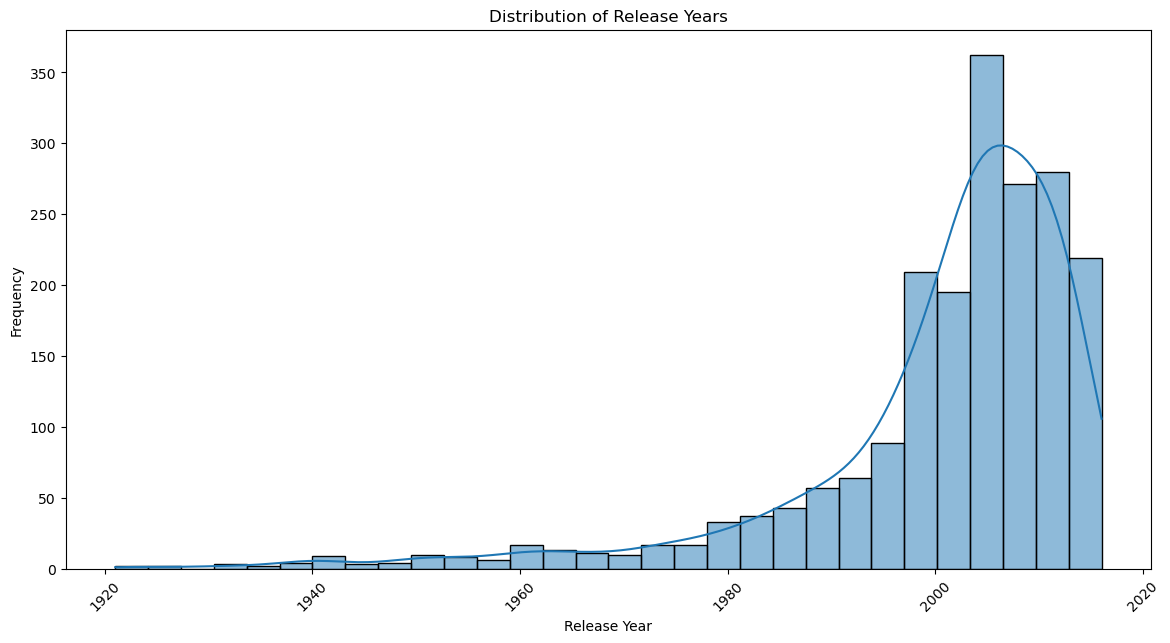

In [21]:
# Plot of Distribution of release year
release_years = data['Release year']

plt.figure(figsize=(14, 7))
sns.histplot(release_years, bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()

Increasing Trend Over Time: There is a clear increasing trend in the number of movies released over the years. The number of movies starts to grow more significantly in the latter half of the 20th century, with a noticeable surge from the 1990s onwards.

Peaks and Declines: There are distinct peaks in certain years, where the number of movies released is especially high, followed by declines. This could indicate years where the movie industry was particularly active or years that were significant for cinema in terms of output.

Recent Dominance: The most recent years in the dataset, which seem to be the late 2000s and early 2010s, dominate the dataset. This could suggest either a bias towards more recent movies in the dataset collection process or an actual increase in movie production in recent years.


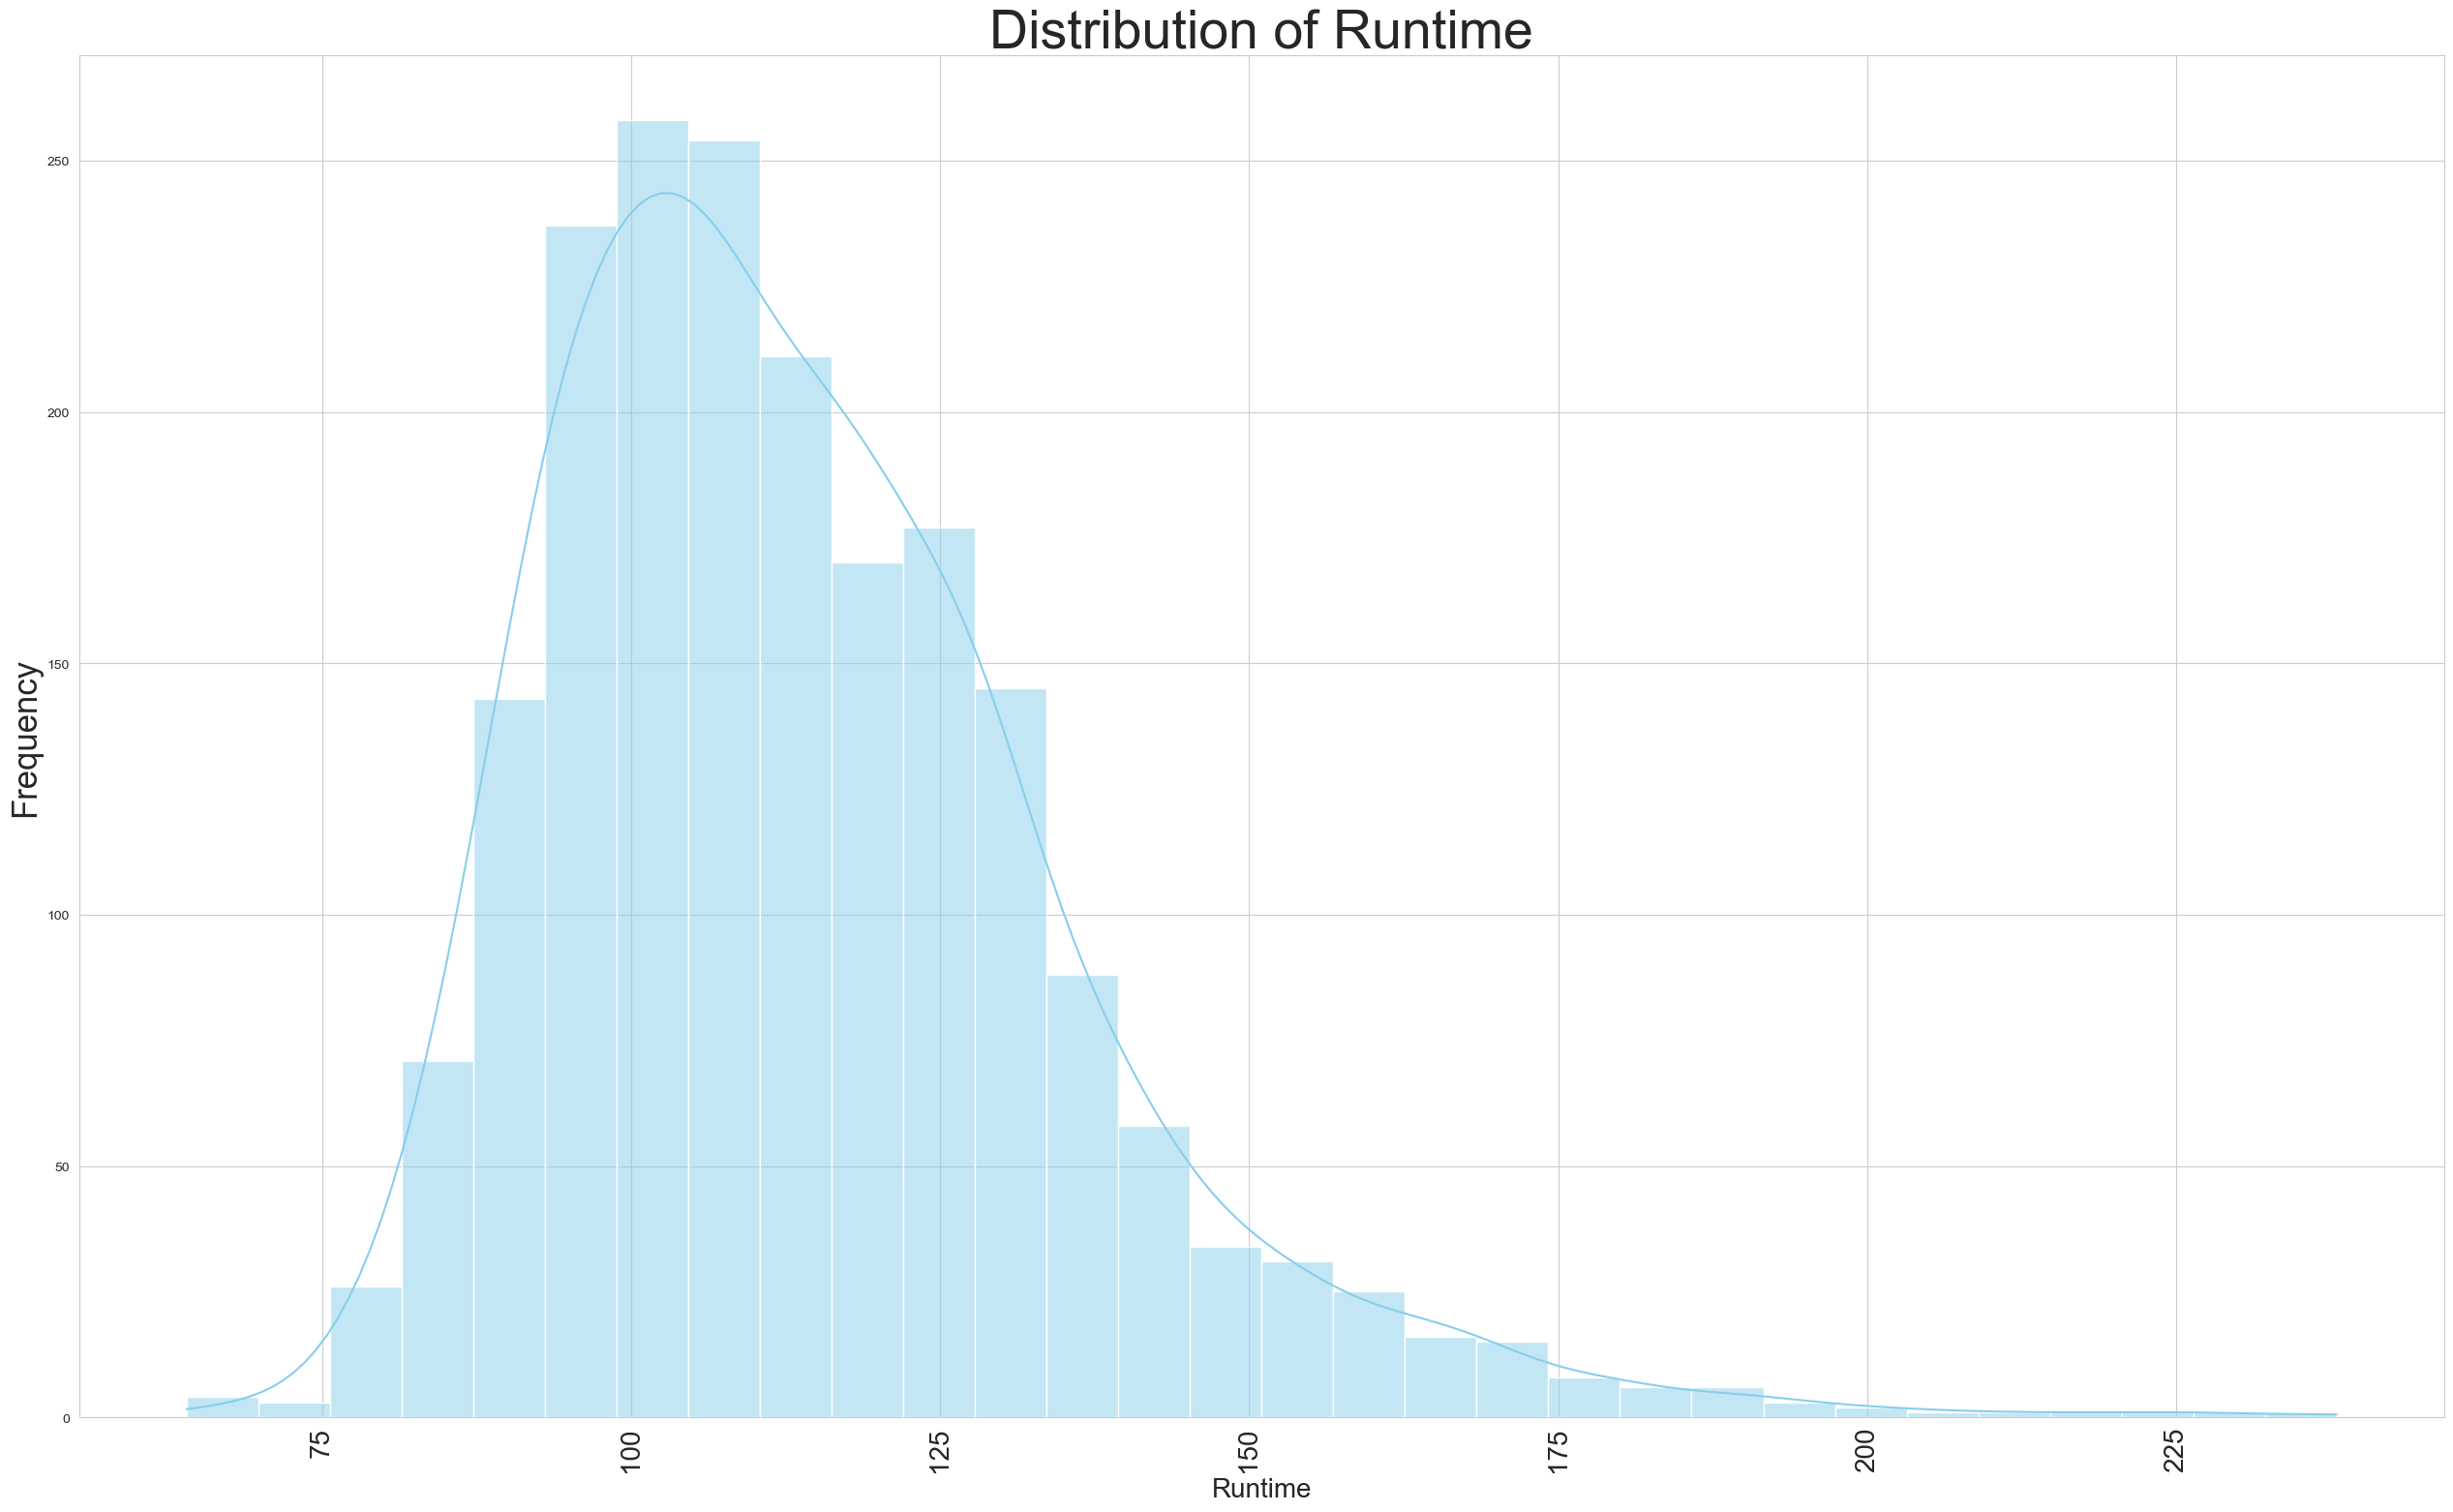

In [22]:
# Plot distribution of 'Runtime'
sns.set_style("whitegrid")


plt.figure(figsize=(50, 45))

plt.subplot(3, 2, 2)

sns.histplot(data=data, x='Runtime', bins=30, kde=True, color='skyblue')

plt.title('Distribution of Runtime', fontsize=40)
plt.xlabel('Runtime', fontsize=20) 
plt.ylabel('Frequency', fontsize=25)

plt.xticks(rotation=90, fontsize=20)

plt.tight_layout(pad=1.0)


plt.show()

Normal-like Distribution: The histogram shows what appears to be a roughly normal distribution of movie runtimes. There's a clear central peak with frequencies tapering off on either side. This indicates that most movies have a duration close to the average runtime, with fewer films at the extremes of very short or very long.

Most Common Runtimes: The peak of the distribution suggests that the most common movie runtimes are around the center of the dataset's range. Given standard film lengths, this is likely in the vicinity of 90 to 120 minutes, which is typical for feature-length films.

Long-Tail on the Right: There's a long tail to the right of the distribution, indicating that while most movies are of standard length, there's a number of films with significantly longer runtimes. These could be epic films, extended versions, or movies that are outliers in terms of content and structure.

Few Very Short or Very Long Films: There are relatively few very short (under 80 minutes) or very long (over 150 minutes) films, which reflects traditional movie industry standards and audience expectations

Text(0.5, 0, 'Metascore')

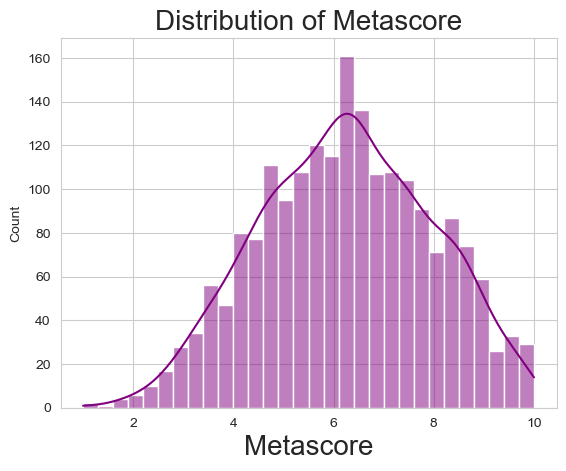

In [23]:
# Plot distribution of 'Metascore'

sns.histplot(data=data, x='Metascore', bins=30, kde=True, color='purple')

plt.title('Distribution of Metascore', fontsize=20)
plt.xlabel('Metascore', fontsize=20) 



Central Tendency: The distribution has a pronounced peak slightly above 5 on the Metascore scale. This peak indicates the most common range of scores that movies in this dataset received.

Skewness: The distribution seems to have a slight right skew, with a tail extending more toward the higher scores. This suggests that there are a few movies with very high Metascores compared to the rest.

Normality: Despite the skew, the overall shape of the distribution has a resemblance to a normal distribution, suggesting that Metascore values are fairly evenly spread around the mean.

Text(0.5, 1.0, 'Distribution of Gross Revenue')

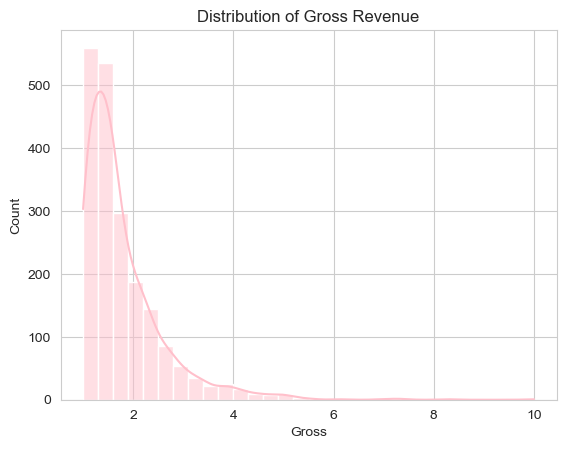

In [21]:
# Plot distribution of 'Gross'
sns.histplot(data=data, x='Gross', bins=30, kde=True, color='pink')
plt.title('Distribution of Gross Revenue')

The histogram for the distribution of gross revenue indicate:

Right-Skewed Distribution: The graph shows that the gross revenue distribution is heavily skewed to the right, meaning there are a large number of movies that have relatively low earnings and a small number that have very high earnings.

Most Movies Earn Less: The peak at the lower end of the gross scale suggests that most movies earn on the lower side of the revenue spectrum.

Blockbusters Are Rare: The long tail to the right indicates that movies with extremely high gross revenues (blockbusters) are relatively rare compared to the total number of movies.

## Bar plot to discover trending genres among movies in the dataset

<Axes: title={'center': 'Top 10 Genres Among Movies'}>

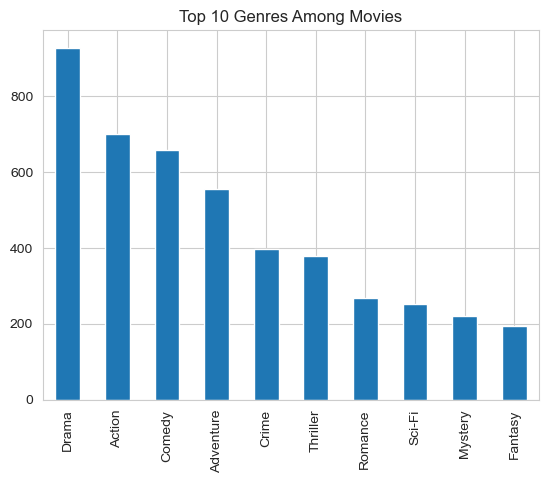

In [22]:
data_exploded = data.explode('Genre')


genre_counts = data_exploded['Genre'].value_counts()

top_10_genres = genre_counts.head(10)

top_10_genres.plot(kind='bar', title='Top 10 Genres Among Movies')

Drama Dominates: The genre with the highest count is Drama, indicating that it's the most prevalent genre among the movies in the dataset.

Action and Comedy Are Popular: Following Drama, Action and Comedy genres also have significant counts, suggesting these are popular genres.

Variety in Top Genres: The presence of Adventure, Crime, Thriller, Romance, Sci-Fi, Mystery, and Fantasy shows there is a good mix of genres represented in the top ten.

Fantasy Less Common: Fantasy appears to be the least common among the top genres, but still makes it to the top ten list.

Implications for Production: The popularity of genres like Drama and Action could influence production decisions in the film industry, as these genres might be associated with a higher likelihood of commercial success.

## Bar plot to discover genres with the highest rating among movies in the dataset

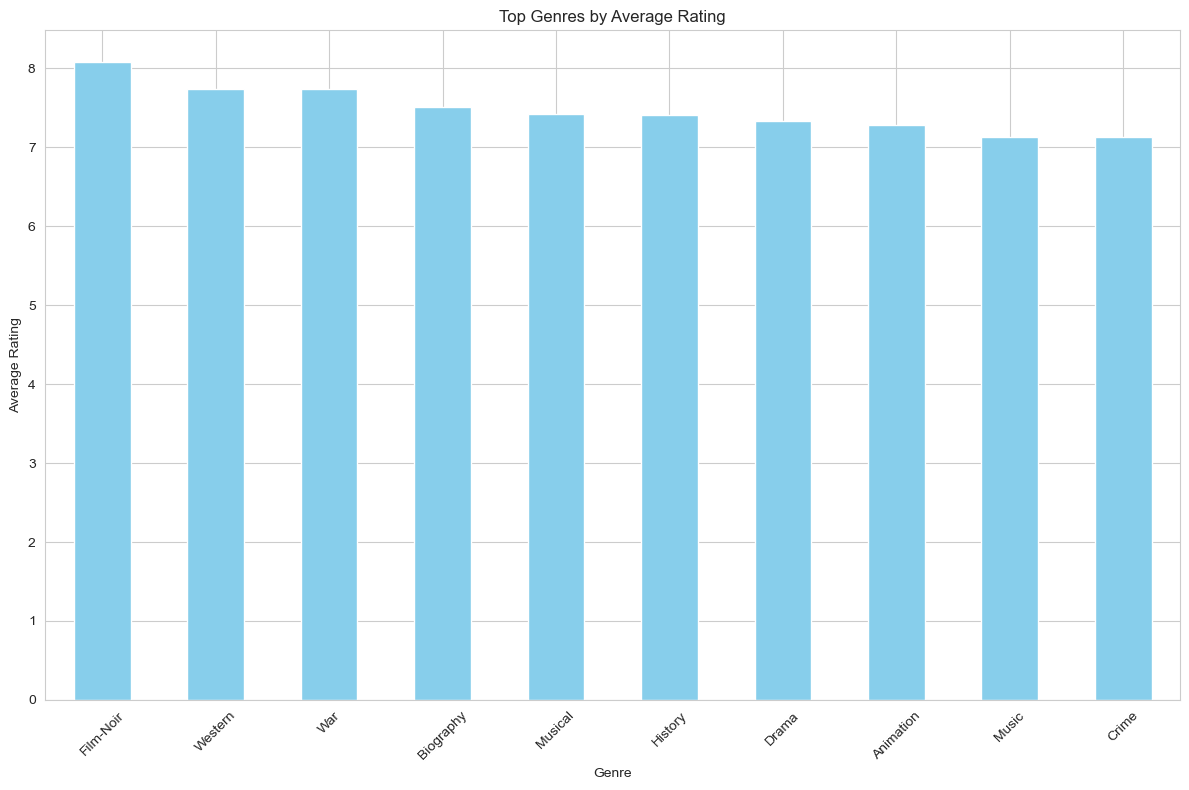

In [23]:
exploded_df = data.explode('Genre')

genre_ratings = exploded_df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)


top_n = 10 
genre_ratings.head(top_n).plot(kind='bar', figsize=(12, 8), color='skyblue')


plt.title('Top Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


Consistent High Ratings: All the genres shown have high average ratings, which likely means they are well-received by audiences or critics.

Close Range: The average ratings are in a close range, suggesting that no single genre drastically outperforms the others in terms of average rating.

Popularity vs. Rating: This chart does not necessarily reflect the popularity of the genres, but rather how highly they are rated on average.

Representation Issue: The genres might contain varying numbers of movies, which isn't depicted in this type of visualization. A genre with a high average rating but few movies could be overrepresented compared to a genre with many movies and a slightly lower average rating.

## Bar plot to discover genres with the highest Average metascore among movies in the dataset

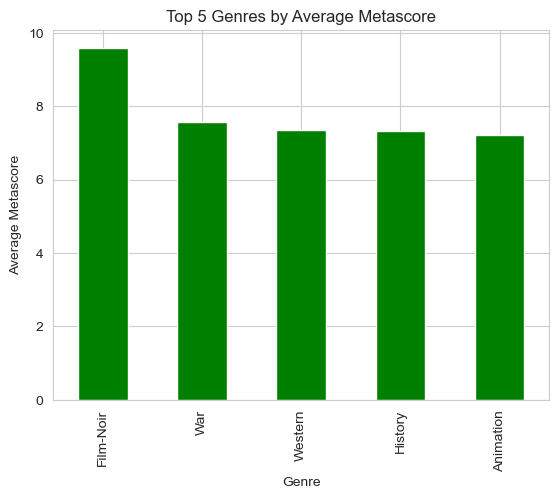

In [24]:

data_exploded = data.explode('Genre')


avg_metascore = data_exploded.groupby('Genre')['Metascore'].mean()

sorted_avg_metascore = avg_metascore.sort_values(ascending=False)


N = 5
top_N_genres = sorted_avg_metascore.head(N)

top_N_genres.plot(kind='bar', title='Top 5 Genres by Average Metascore', color='green')
plt.ylabel('Average Metascore')
plt.show()

Highest Rated Genre: "Film-Noir" appears as the highest-rated genre, suggesting that, on average, films in this genre are critically acclaimed or well-received by critics.

Close Ratings: The genres "War," "Western," "History," and "Animation" have very similar average Metascores. The small differences between the bars indicate that these genres tend to receive comparable critical acclaim.

Range of Metascores: All the genres have high average Metascores, with the lowest among the top genres being close to 7 and the highest above 8. This suggests that movies in these genres are generally rated favorably.

Diversity of Genres: The genres presented cover a diverse range of film types, from the classic "Film-Noir" to modern "Animation." This diversity indicates that critically acclaimed films are not confined to a particular style or era.

Genre Representation: The chart suggests that "Film-Noir," despite being a less common genre today, still holds a place as the top-rated genre in terms of Metascore. It's noteworthy that classic genres like "War" and "Western" continue to be well-regarded, while "History" and "Animation" also receive high critical praise.

## Bar plot to discover genres with the highest total gross among movies in the dataset

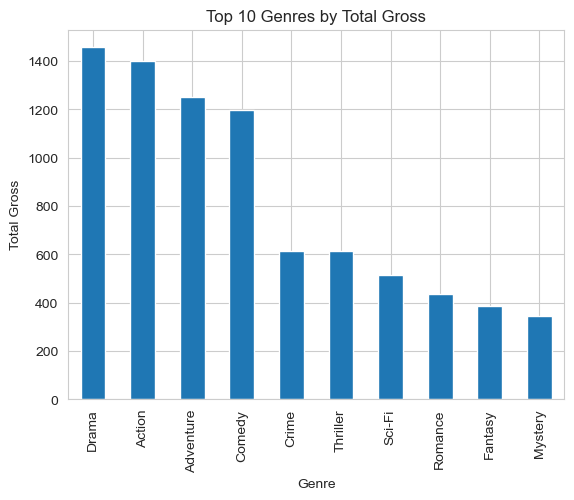

In [24]:
data_exploded = data.explode('Genre')

genre_gross = data_exploded.groupby('Genre')['Gross'].sum()

top_n_genres_by_gross = genre_gross.sort_values(ascending=False).head(10)

top_n_genres_by_gross.plot(kind='bar', title='Top 10 Genres by Total Gross')
plt.xlabel('Genre')
plt.ylabel('Total Gross')
plt.show()

Genre Popularity: Drama, Action, and Adventure genres lead in total gross revenue, indicating their widespread popularity and potential box office appeal.

Revenue Distribution: There's a notable drop-off in total gross revenue after the top three genres, with Comedy, Crime, and Thriller following behind. This suggests that while there are standout genres that consistently perform well at the box office, there is a diverse range of genres that also contribute significantly to the industry's revenue.

Comparatively Lower Grossing Genres: Sci-Fi, Romance, Fantasy, and Mystery have lower total gross revenues in comparison to the leading genres. Despite this, their presence in the top 10 indicates they have a solid market presence.

Market Trends: The chart may reflect market trends and audience preferences, with Drama and Action films likely drawing larger audiences. The high performance of the Adventure genre could also be attributed to the popularity of blockbuster franchises and family-friendly films.

Diversity in High-Grossing Genres: The top-grossing genres are diverse, covering a range of storytelling styles from the character-driven Drama to the spectacle-driven Action and Adventure genres.

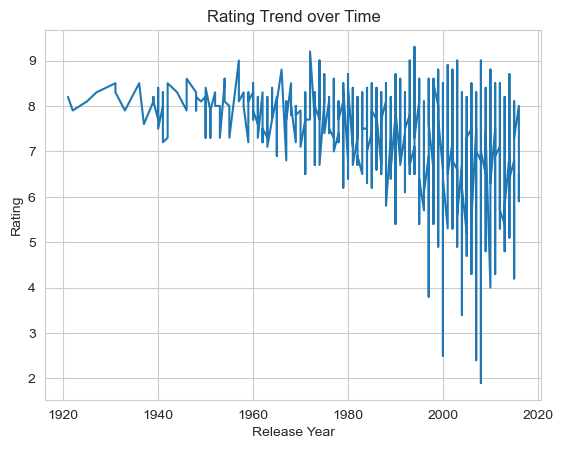

In [26]:
data['Release year'] = pd.to_datetime(data['Release year'], format='%Y')
data.sort_values(by='Release year', inplace=True)

# Ratings over time
plt.plot(data['Release year'], data['Rating'])
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.title('Rating Trend over Time')
plt.show()

Consistently High Ratings: The line plot shows that, overall, movies have received consistently high ratings across all the years considered in the dataset. This indicates that the majority of movies tend to be well-received by viewers.

Clustering of Lines in the Later Years: The cluster of lines in the later years (1990-2020) suggests a higher concentration of movies released during this period. This could be due to factors such as increased movie production, expanded access to distribution channels, or the growth of the film industry.

Variation in Ratings: Despite the overall high ratings, the presence of some low ratings in the later years indicates that there are movies in that period that did not receive favorable ratings. This variation might be attributed to factors such as the diversity of movie genres, different audience preferences, or the quality and reception of individual films.

Impact of Changing Trends: The presence of low ratings in the later years could be influenced by changing cinematic trends, evolving audience tastes, or the emergence of new storytelling techniques. These factors can contribute to a wider range of ratings, including both high and low scores.

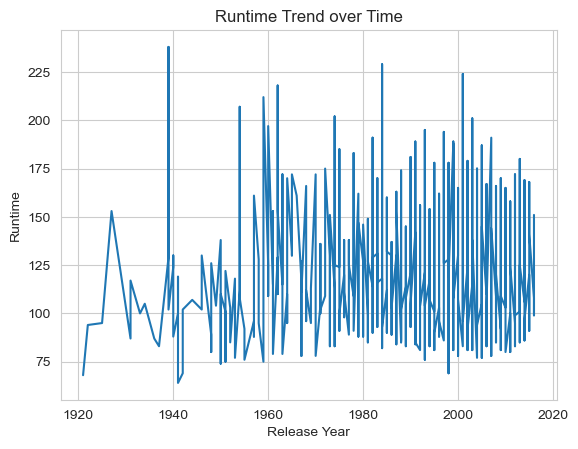

In [27]:
# Runtime over time
plt.plot(data['Release year'], data['Runtime'])
plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.title('Runtime Trend over Time')
plt.show()

Consistent Runtime Range: The plot indicates that the majority of movies, especially those released after 1960, have runtimes ranging from approximately 90 to 175 minutes. This suggests that filmmakers and studios have tended to adhere to a certain duration range when producing movies during this period.

Variations in Runtime: Despite the consistent range, the plot also reveals that there are movies with runtimes both higher and lower than the typical range. This indicates that filmmakers have made creative choices to deviate from the average runtime, potentially to better suit the storytelling needs or artistic vision of their films.

Early Years: In the earlier years depicted on the left side of the plot, movies generally had shorter runtimes that did not exceed 150 minutes. This could be due to factors such as technological limitations, storytelling conventions, or audience preferences during that era. It is interesting to note that longer movies were less common during this period.

Increasing Runtimes: As we move towards the more recent years on the right side of the plot, there seems to be a slight increase in the average runtime of movies. This could be attributed to various factors such as advancements in filmmaking techniques, the willingness of audiences to engage with longer narratives, and the evolving tastes and expectations of viewers.

Impact of Genre: It's important to consider the influence of different movie genres on the observed runtime trends. Certain genres, such as action or comedy, tend to have shorter runtimes, while others like drama or epic films often require longer durations to fully develop their narratives. Therefore, the plot may reflect the average runtime trend across multiple genres, but individual genres might have their own unique patterns.

Outliers: The plot contain outliers, represented by movies with significantly higher or lower runtimes than the average. These outliers could be attributed to factors such as experimental films, documentaries, or special cases where filmmakers intentionally deviate from the standard runtime conventions to achieve specific artistic or storytelling goals.

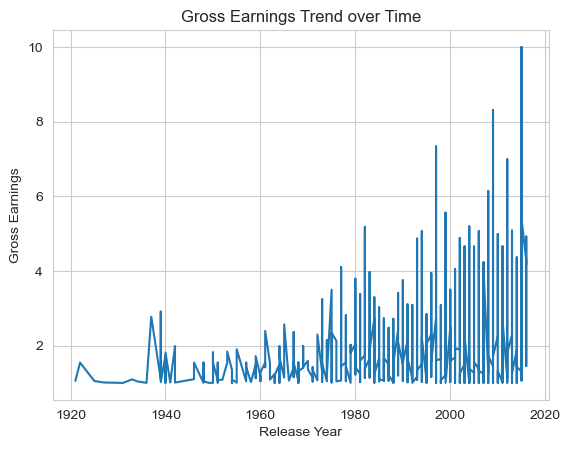

In [28]:
# Gross earnings over time
plt.plot(data['Release year'], data['Gross'])
plt.xlabel('Release Year')
plt.ylabel('Gross Earnings')
plt.title('Gross Earnings Trend over Time')
plt.show()

Increasing Trend: The plot clearly indicates that the gross earnings of movies have been increasing over the years. This suggests that, on average, movies have been generating higher revenues in later years compared to earlier years.

Higher Gross Earnings: In the later years represented on the right side of the plot, there is a notable increase in the gross earnings of movies. This indicates that movies released during these years have been more commercially successful, generating significantly higher revenues.

Clustered Range: The plot shows that the majority of movies have gross earnings that fall within the range of 1 to 5 billion dollars. This suggests that this range is common for movies in terms of their financial performance. It is important to note that the gross earnings are scaled in billions, as mentioned in the assumption.

High Gross Earnings Outliers: In the later years, there are movies that have exceptionally high gross earnings, reaching up to 10 billion dollars or more. These movies can be considered as outliers or blockbuster hits that have achieved significant commercial success. Such movies often have a combination of factors like a highly anticipated franchise, a large fan base, critical acclaim, effective marketing, and global appeal.

Influence of Successful Franchises: The increased gross earnings in later years could be attributed to the success of popular movie franchises. Sequels, spin-offs, and cinematic universes have become more prevalent in recent years, attracting a dedicated fan base and generating substantial revenues.

Global Box Office Growth: The rise in gross earnings over time can also be attributed to the growth of the global box office. The expansion of international markets, particularly in countries like China, has contributed to the overall increase in movie revenues.

In [29]:
director_ratings = data.groupby('Director')['Rating'].mean()
director_earnings = data.groupby('Director')['Gross'].sum()

director_ratings = director_ratings.sort_values(ascending=False)
director_earnings = director_earnings.sort_values(ascending=False)

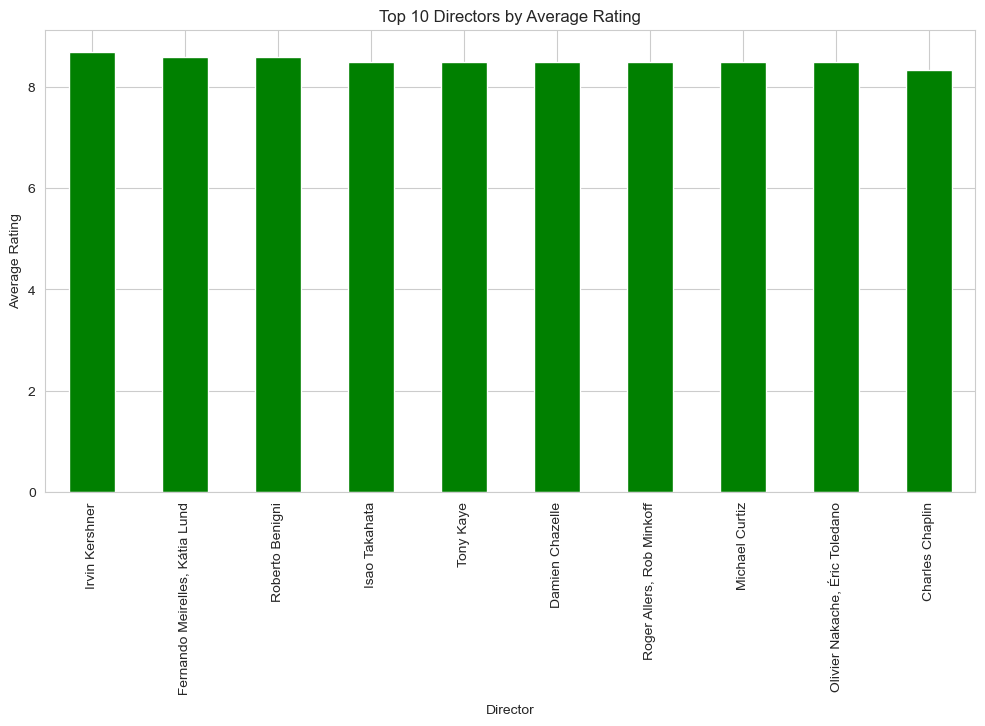

In [30]:
plt.figure(figsize=(12, 6))
director_ratings[:10].plot(kind='bar', color='green')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Top 10 Directors by Average Rating')
plt.show()

High Average Ratings: The plot indicates that the top 10 directors have achieved high average ratings for their movies. This suggests that their work has been consistently well-received and highly regarded by viewers or critics.

Close Range of Average Ratings: The plot shows that the average ratings of these directors are in a close range. This implies that the movies directed by these filmmakers have been perceived to have similar levels of quality and excellence. The narrow range of average ratings suggests a certain level of consistency in the quality of their work.

Subjectivity of Ratings: It's important to note that movie ratings can be subjective, and individual preferences may vary. While the average ratings indicate a high level of appreciation for these directors' work, it's possible that different viewers or critics may have slightly different opinions on the quality and impact of their movies.

Reputation and Influence: The fact that these directors have achieved high average ratings highlights their reputation and influence in the film industry. Their work has likely left a significant impact on audiences, critics, and the broader filmmaking community.

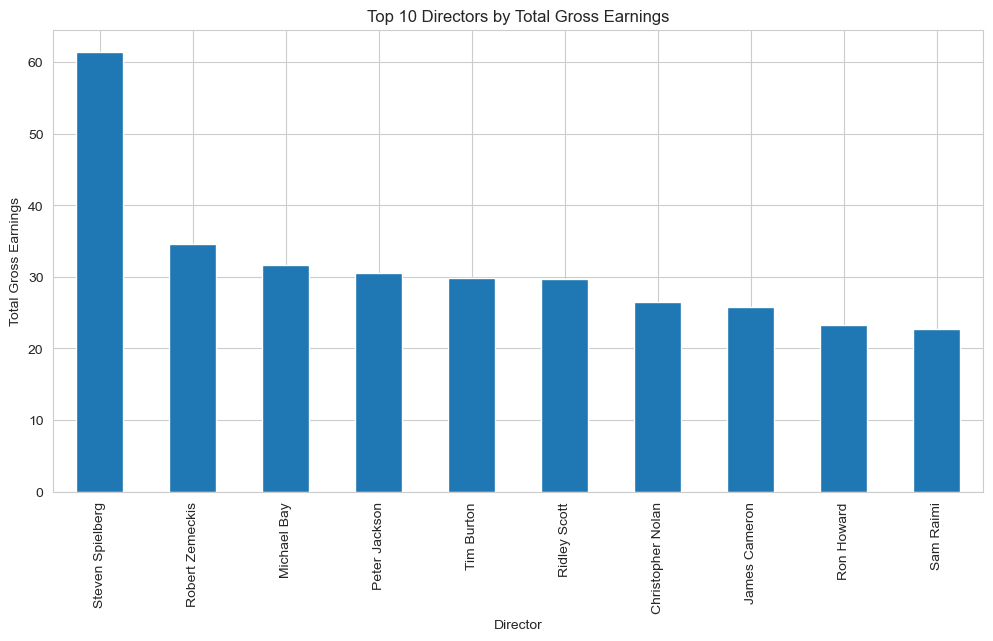

In [31]:
plt.figure(figsize=(12, 6))
director_earnings[:10].plot(kind='bar')
plt.xlabel('Director')
plt.ylabel('Total Gross Earnings')
plt.title('Top 10 Directors by Total Gross Earnings')
plt.show()

The plot reveals that Steven Spielberg has the highest total earnings among all directors. This indicates that his movies, collectively, have generated the highest amount of box office revenue compared to other directors in the plot. Spielberg's success highlights his status as one of the most commercially successful and influential directors in the industry.

Double the Earnings: The analysis reveals that Spielberg's total earnings are nearly double the earnings of the other directors on the plot. This significant difference emphasizes his exceptional financial success and underscores his impact on the box office. Spielberg's ability to consistently deliver commercially successful movies has set him apart from his peers.

Proximity of Other Directors: The rest of the directors, excluding Spielberg, appear to have similar levels of total earnings, as indicated by their relatively close bar heights. While Spielberg stands out with his significantly higher earnings, the other directors' earnings are relatively comparable to each other.

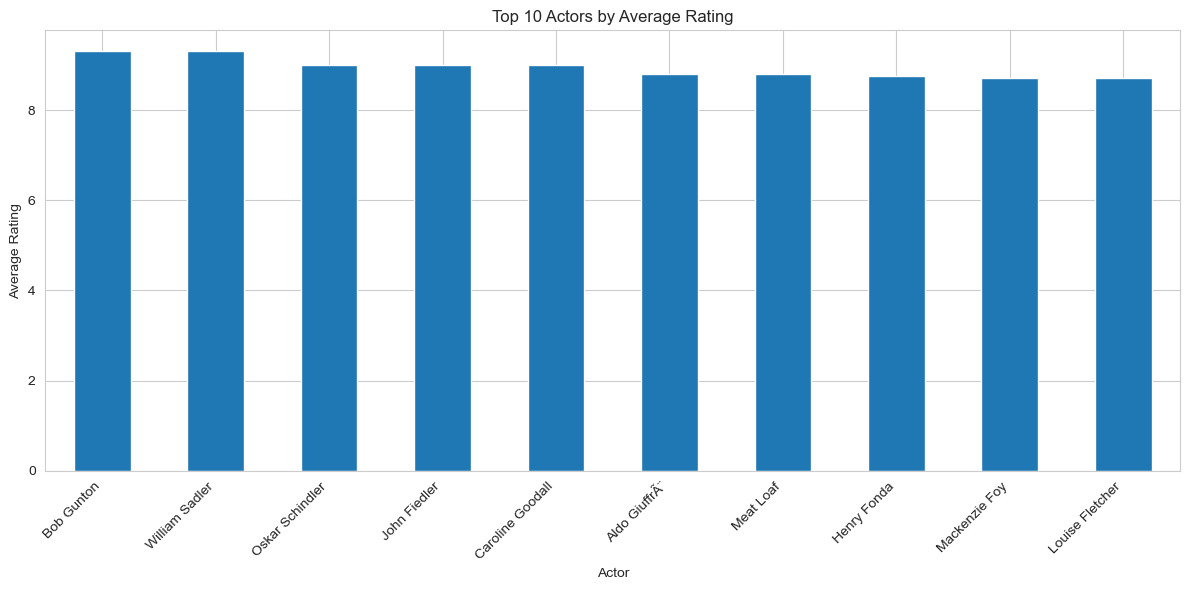

In [32]:
data_exploded = data.explode('Stars')

# Calculate the mean rating for each individual actor
star_ratings = data_exploded.groupby('Stars')['Rating'].mean()

# Calculate the sum of gross earnings for each individual actor (if needed)
# star_earnings = data_exploded.groupby('Stars')['Gross'].sum()

# Sort the ratings in descending order to get the top-rated actors
star_ratings = star_ratings.sort_values(ascending=False)

# Plot the top 10 actors by average rating
plt.figure(figsize=(12, 6))
star_ratings[:10].plot(kind='bar')
plt.xlabel('Actor')
plt.ylabel('Average Rating')
plt.title('Top 10 Actors by Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels
plt.show()

The top 10 actors have consistently received high average ratings for their performances, indicating that their acting skills are highly regarded by viewers and critics.

The average ratings for these actors are closely grouped together, suggesting that the movies they appear in are perceived to have similar levels of acting quality.

The ratings of these actors are very similar, with only slight variations among them. This indicates that they consistently deliver performances of a consistently high standard.

These actors demonstrate a consistent level of strong acting skills and the ability to effectively embody their roles.

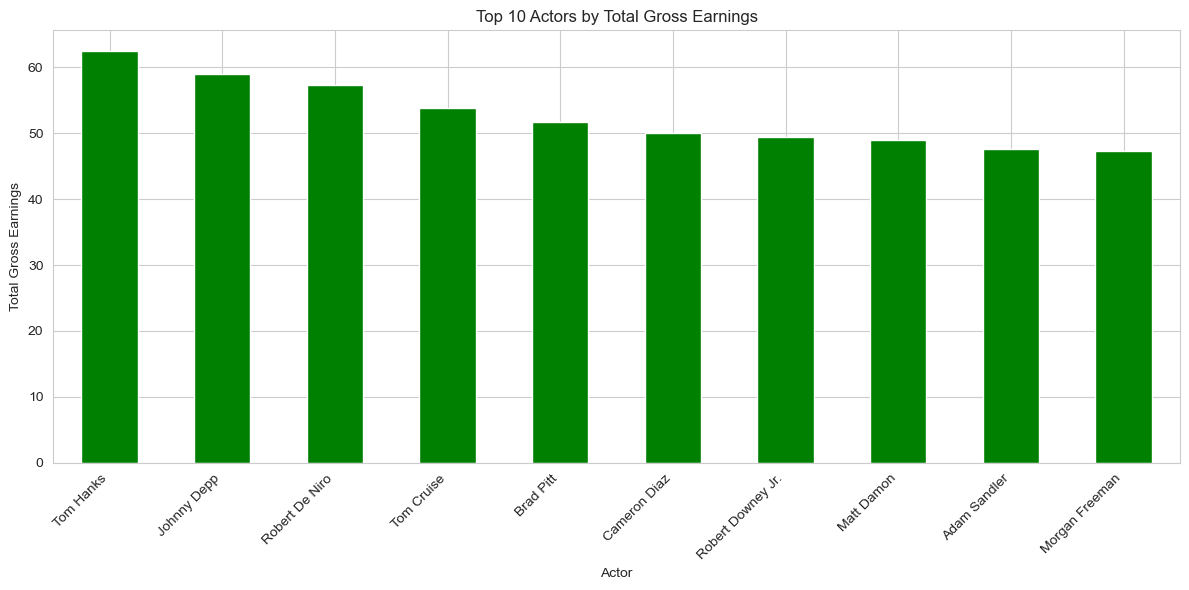

In [33]:
# If the 'Stars' column has actors grouped together, we'll split them into individual rows
data_exploded = data.explode('Stars')

# Calculate the sum of gross earnings for each individual actor
star_earnings = data_exploded.groupby('Stars')['Gross'].sum()

# Sort the gross earnings in descending order to get the top earners
star_earnings = star_earnings.sort_values(ascending=False)

# Plot the top 10 stars by total gross earnings
plt.figure(figsize=(12, 6))
star_earnings[:10].plot(kind='bar', color='green')
plt.xlabel('Actor')
plt.ylabel('Total Gross Earnings')
plt.title('Top 10 Actors by Total Gross Earnings')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels
plt.show()

The graph shows that Tom Hanks stands out as the highest-earning actor in terms of total gross earnings. His movies have generated significant box office revenue, indicating his exceptional commercial success and popularity among audiences.

Following Tom Hanks, Johnny Depp and Robert De Niro have also achieved high total gross earnings. Their movies have performed well at the box office, contributing to their financial success and establishing them as influential and bankable actors.

Proximity of Earnings: The information provided indicates that the remaining actors on the plot are relatively close to each other in terms of total gross earnings. While the specific values may vary, their earnings fall within a similar range, suggesting comparable levels of commercial success among these actors.

## EDA

### Lets explore the relationship between the attributes.

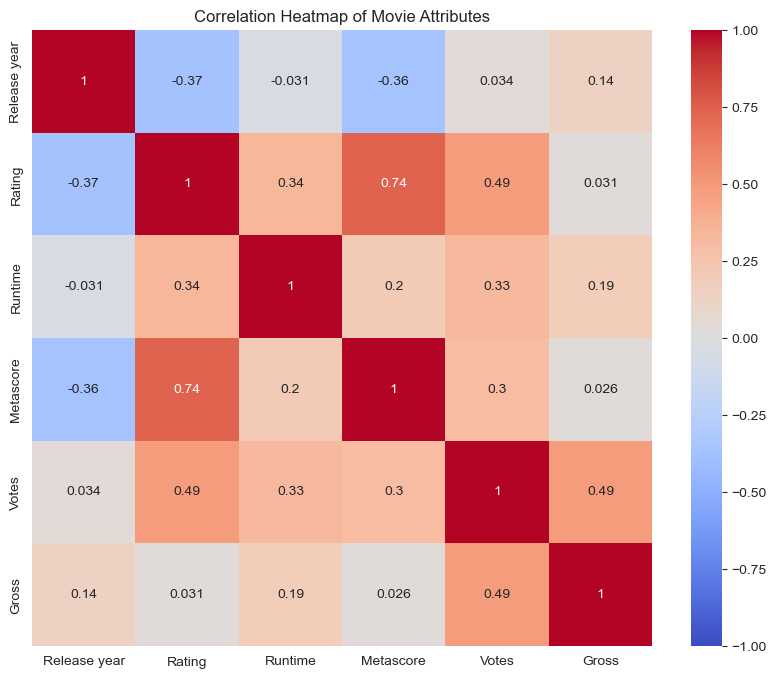

In [25]:

corrs = data[['Release year', 'Rating', 'Runtime', 'Metascore', 'Votes', 'Gross']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corrs, annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Correlation Heatmap of Movie Attributes')
plt.show()

From the figuer above, we can interprut that a correlation coefficient of 0.74 between "Rating" and "Metascore" indicates a strong positive correlation between the IMDb rating of movies and their Metascore ratings. This suggests that movies with higher IMDb ratings tend to also have higher Metascore ratings, indicating agreement between both rating systems.

Regarding the correlation coefficient of 0.49 between "Votes" and "Rating," it suggests a moderate positive correlation between the number of votes a movie receives and its IMDb rating. This implies that movies with higher IMDb ratings tend to attract more votes, indicating a level of popularity or viewer engagement.

A correlation coefficient of 0.33 between "runtime" and "votes" indicates a moderate positive correlation between the runtime of movies and the number of votes they receive. This suggests that movies with longer runtimes tend to receive more votes, Similarly, a correlation coefficient of 0.31 between "rating" and "gross" indicates a moderate positive correlation between the rating of movies and their gross earnings. This suggests that movies with higher ratings tend to have higher gross earnings, but again, it's not a very strong relationship.

<Axes: xlabel='Rating', ylabel='Gross'>

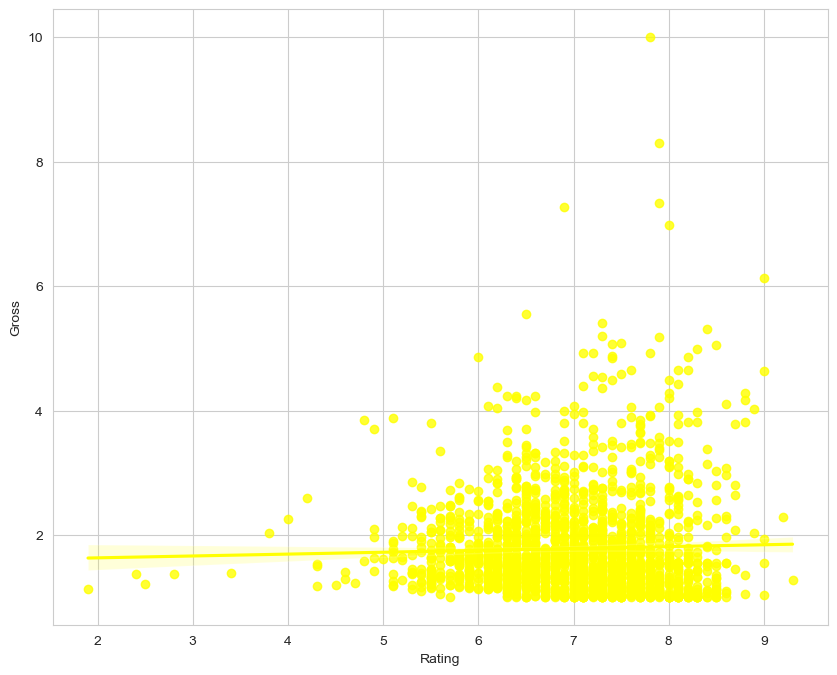

In [26]:
plt.figure(figsize=(10,8))
sns.regplot(x='Rating',y='Gross',data=data,color='yellow')

Density of Data Points: The majority of the data points are clustered at the lower end of the Gross revenue axis, suggesting that most movies do not earn extremely high gross revenues, which is consistent with the industry where a few movies earn the majority of the revenue.

Scatter Distribution: There is a wide scatter in Gross revenue across all IMDb ratings. Movies with mid-range IMDb ratings (around 5 to 8) show a wide variation in Gross revenue, indicating that a moderate IMDb rating does not necessarily predict a movie's financial success.

High Grossing Outliers: There are a few outliers with very high Gross revenues, which appear to be spread across a range of IMDb ratings from around 6 to 9. These are likely blockbuster hits that, regardless of their IMDb rating, managed to achieve significant box office success.

Lack of Strong Correlation: There does not appear to be a strong direct correlation between IMDb ratings and Gross revenue. While there are movies with high ratings that have high Gross revenues, there are also many with high ratings that do not gross as much, and vice versa.

Rating Threshold for High Gross: There seems to be a threshold IMDb rating (around 6) below which very few movies achieve high gross revenues. Most of the higher grossing movies have a rating above this threshold.

No Clear Trend: There is no clear upward or downward trend in the plot that would suggest higher ratings correspond to higher gross revenues or vice versa.

In summary, the plot suggests that while there may be a general positive trend (movies with higher ratings also tend to have higher gross revenues), there are many exceptions, and the relationship is not strong enough to make definitive predictions about a movie's financial success based solely on its IMDb rating. Other factors not depicted in the scatter plot.

<Axes: xlabel='Metascore', ylabel='Gross'>

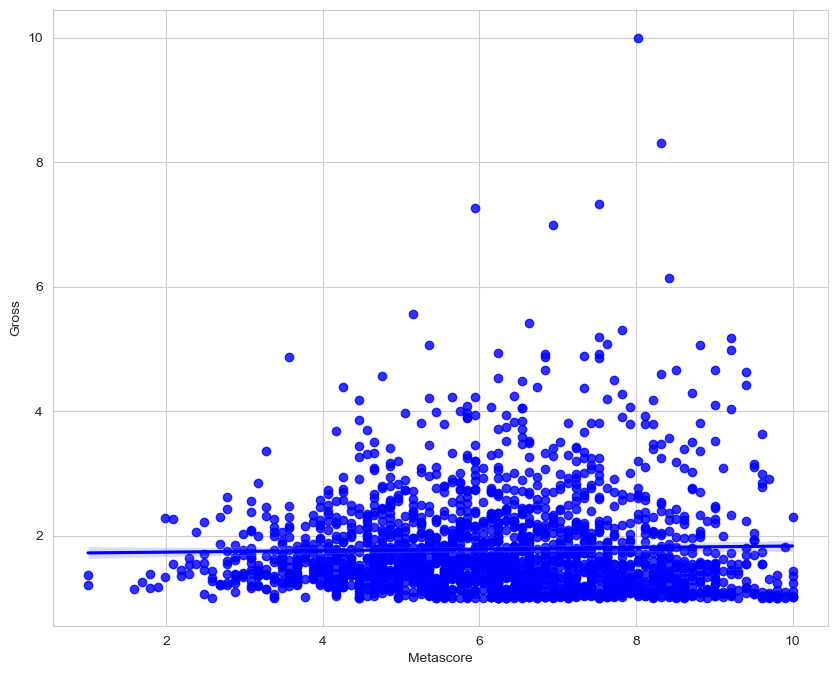

In [27]:
plt.figure(figsize=(10,8))
sns.regplot(x='Metascore',y='Gross',data=data,color='blue')

Weak to No Apparent Correlation: The visualization does not show a clear linear relationship between Gross revenue and Metascore. The data points are widely spread out, indicating that a higher Metascore doesn't consistently align with higher Gross revenue, and vice versa.

High Grossing Films Across Metascores: There are films with a wide range of Metascores that have achieved high Gross revenue. This indicates that factors other than critical acclaim, as measured by Metascore, may have a substantial impact on financial success.

Cluster of Lower Grossing Films: There is a concentration of data points at the lower end of the Gross revenue scale across various Metascores. This means most movies do not achieve enormous box office success regardless of their critical reception.

Outliers: Some films show exceptionally high Gross revenue, which could be attributed to blockbuster status, but these do not necessarily have the highest Metascores. Conversely, some films with high Metascores do not show exceptionally high Gross revenue.

In summary, the relationship between Gross revenue and Metascore in this data appears to be non-linear and weak. Critical acclaim, as assessed by Metascore, is not a guaranteed predictor of financial performance at the box office. The success in terms of revenue is likely influenced by a multitude of factors, including but not limited to, marketing, distribution, audience appeal, star power, and competition at the time of release.

<Axes: xlabel='Runtime', ylabel='Gross'>

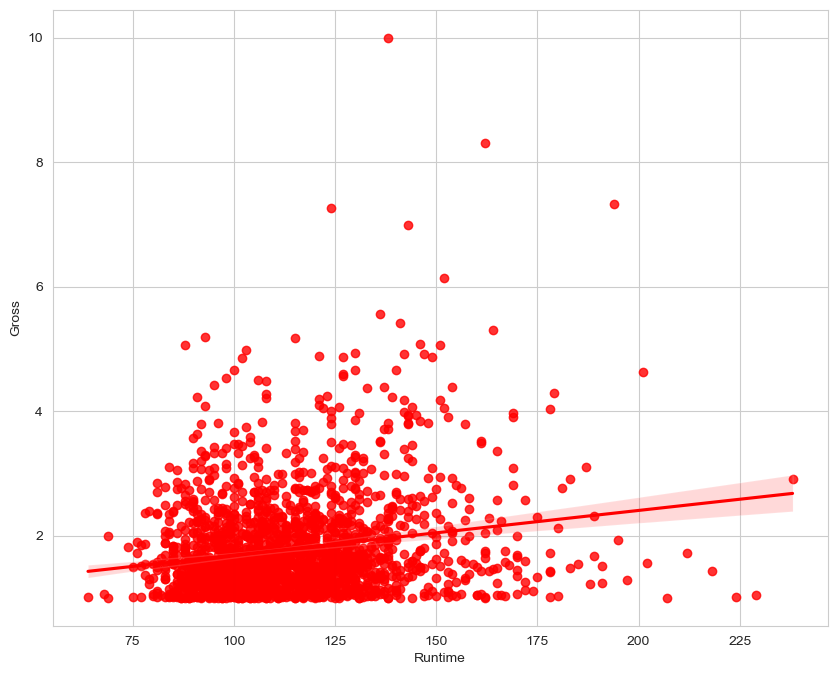

In [28]:
plt.figure(figsize=(10,8))
sns.regplot(x='Runtime',y='Gross',data=data,color='red')

Weak Positive Correlation: The upward slope of the trend line suggests there is a weak positive correlation between runtime and gross. In general, as movies get longer, they might gross slightly more, but this relationship is not strong.

Concentration of Data Points: There is a significant concentration of data points at the lower end of the Gross axis, indicating that most movies have a lower gross revenue. This is typical for the film industry, where a majority of movies do not become blockbuster hits.

Spread of Gross Revenues: For any given runtime, there is a wide spread of gross revenues. This implies that runtime alone is not a strong predictor of a movie's financial success.

Outliers: Some movies with long runtimes appear to have higher gross revenues, indicating that certain longer films can be quite successful. However, there are also long movies that do not gross as much.

High Grossing Short Films: There are also outliers with shorter runtimes that have high gross revenues. These could be highly successful short films or films with significant cultural impact.

Popular Movie Durations: The dense cluster of data points around the 90-120 minute mark corresponds with the typical runtime for feature films and indicates that most movies adhere to this industry standard.

Runtime Limitation for Success: The trend line and data points suggest that there's no strong threshold effect where movies have to be a certain length to achieve higher gross revenue.

The relationship depicted by the trend line is a generalization, and the substantial scatter around it suggests that there are many other factors at play that influence a movie's gross revenue, such as genre, marketing, the presence of star actors, competition at the time of release, and overall market conditions.

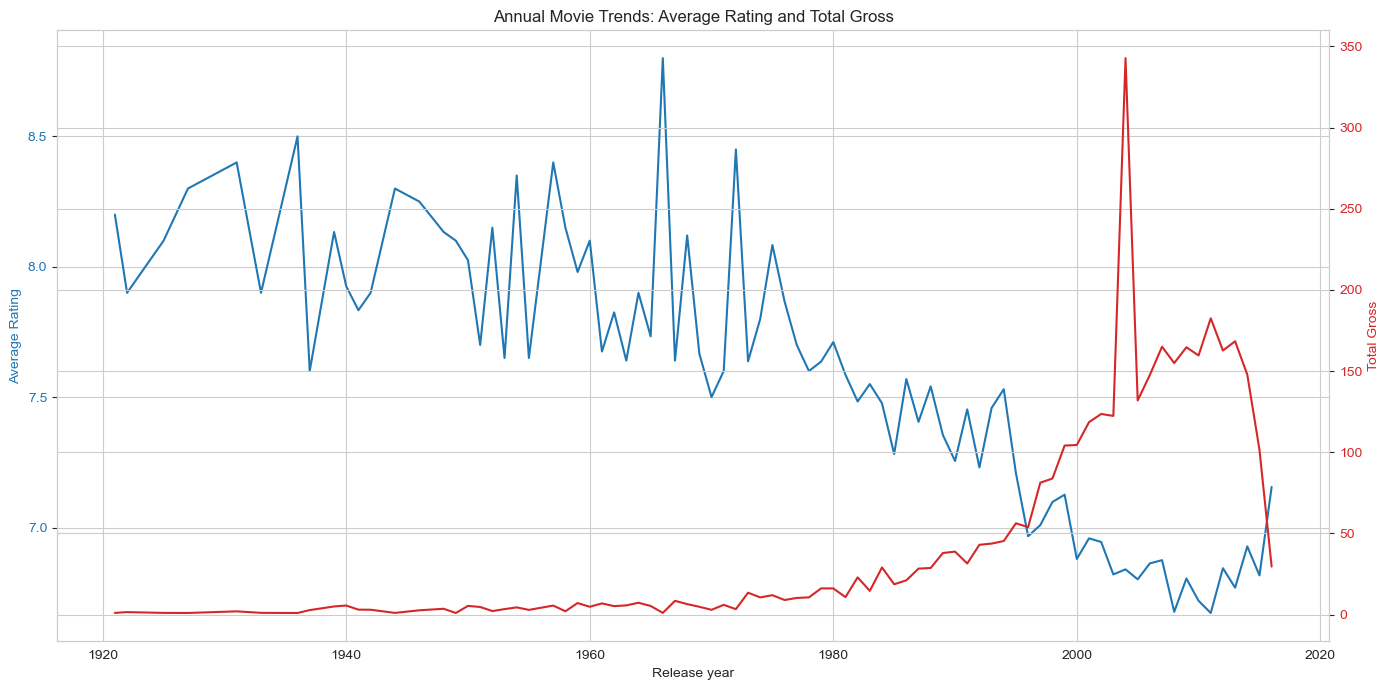

In [29]:
#Annual Movies trends


movie_DF['Release year'] = pd.to_numeric(movie_DF['Release year'], errors='coerce')


annual_stats = movie_DF.groupby('Release year').agg({
    'Rating': 'mean',
    'Gross': 'sum'
})

annual_stats = annual_stats.reset_index()


fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Release year')
ax1.set_ylabel('Average Rating', color=color)
ax1.plot(annual_stats['Release year'], annual_stats['Rating'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  


color = 'tab:red'
ax2.set_ylabel('Total Gross', color=color)  
ax2.plot(annual_stats['Release year'], annual_stats['Gross'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Annual Movie Trends: Average Rating and Total Gross')
fig.tight_layout() 
plt.show()


1- Average Rating Trend: The blue line shows fluctuations in average ratings over time. There are periods, especially mid-century, where average ratings spike, which could correspond to years with highly acclaimed movies. Starting around the 1980s, there's a noticeable downward trend in average ratings.

2- Total Gross Trend: The red line indicates total gross revenue, which generally increases over time. There's a significant spike in gross revenue around the 2010s, followed by a sharp decline. The spike may indicate a year or period with exceptionally high-grossing films, while the decline could be due to incomplete data for recent years, a change in movie consumption patterns, or external factors affecting the film industry.

3- Correlation between Rating and Gross: There doesn't seem to be a strong correlation between the average ratings and total gross revenue. High-grossing years don't necessarily coincide with years that had higher average ratings.



4- The decline in average ratings over the past few decades could indicate either a change in movie production quality, a shift in critical perception, or possibly a larger volume of movies with lower ratings being produced.
5-The sharp increase and subsequent decrease in total gross suggest that external factors (such as the rise of digital streaming platforms, changes in consumer behavior, economic factors, or data availability) might significantly impact box office performance.
6- Data Outliers: The extreme spike in total gross could represent an outlier year with abnormally high revenue, possibly due to blockbuster releases, changes in ticket prices, or the way revenue was reported or collected.